In [68]:
from scipy import stats
import pandas as pd
import os
import numpy as np
import wquantiles
from statsmodels import robust
import glob
import seaborn as sns

In [4]:
# Use root for analysis, instead of notebooks folder. 
# WARNING: Only run this once!
print("Current WD:", os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Analysis WD:", os.getcwd())

Current WD: c:\Users\jeffc\source\repos\practical-stats-book\notebooks
Analysis WD: c:\Users\jeffc\source\repos\practical-stats-book


# Chapter 1: Exploratory Data Analysis
The first step of any data science project: exploring the data.

## Data Types
Numeric: 
- Continuous: can take any value in an interval (float)
- Discrete: integers

Categorical
- Binary: two values (T/F, 1/0)
- Ordinal: has ordering


## Rectangular Data
- Data Frame: ie - a spreadsheet
- Feature: a column
- Outcome: ie - dependent variable, response, target, output
- Records: row within a table

## Non-Rectangular Data
- Graphs (connected data)
- JSON (nested data)
- Time Series
- Spatial data (maps)

## Estimates of location
- Mean
- Weighted Mean
- Median
- Percentile
- Weighted Median
- Trimmed Mean
- Robust
- Outlier

In [34]:
# Trimmed Mean
df = pd.concat(map(pd.read_csv, glob.glob('data/raw/jobspostings-*.csv')))
print("Mean:,",df["companyrating"].mean())

print("Trimmed Mean (10%):", stats.trim_mean(df["companyrating"], 0.1))

print("Median:", df["companyrating"].median())


Mean:, 3.71037037037037
Trimmed Mean (10%): 3.8704166666666664
Median: 3.9


In [16]:
# Weighted Mean & Median
df["companyratings"] = df.apply(lambda x: float(str(x["companyratings"]).replace(" Ratings", "").replace(" Rating", "")), axis=1)
df = df[df["companyratings"].notnull()]
print("Weighted Average (by # ratings):", np.average(df["companyrating"], weights=df["companyratings"]))
print("Weighted Median (by # ratings):", wquantiles.median(df["companyrating"], weights=df["companyratings"]))

Weighted Average (by # ratings): 3.9166476903057905
Weighted Median (by # ratings): 3.9


C:\Users\jeffc\AppData\Local\Temp\ipykernel_15732\2071697720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["companyratings"] = df.apply(lambda x: float(str(x["companyratings"]).replace(" Ratings", "").replace(" Rating", "")), axis=1)


## Estimates of Variability
- Deviations (differences between actual values and estimated values - aka "errors", "residuals")
- Variance (sum of squared deviations divided by n-1 - aka "mean squared error")
- Standard Deviation (square root of variance)
- Mean Absolute Deviation (mean of the absolute values from the deviations from the mean - aka "l1-norm", "manhattan norm")
- Median absolute deviation (the median of the absolute values from the deviations from the median)
- Range (difference from min to max)
- Order Statistics (metrics based on sorting values - ie: ranks)
- Percentile (The value such that P percent of the values take on this value or less and 100-P percent take on this value or more - aka "quantile")
- Interquartile Range (difference from 75th percentile to 25th percentile - aka "IQR")

In [27]:
# Standard Deviation
print("Variance:", df["companyrating"].var())
print("Standard Deviation:", df["companyrating"].std())

# Percentiles
print("Percentile (80th):", df["companyrating"].quantile(0.80))
print("Percentile (70th):", df["companyrating"].quantile(0.70))
print("Percentile (60th):", df["companyrating"].quantile(0.60))
print("Percentile (50th):", df["companyrating"].quantile(0.50))
print("Percentile (40th):", df["companyrating"].quantile(0.40))
print("Percentile (30th):" , df["companyrating"].quantile(0.30))
print("Percentile (20th):", df["companyrating"].quantile(0.20))

# Interquartile Range
print("IQR: ", df["companyrating"].quantile(0.75) - df["companyrating"].quantile(0.25))

# median absolute deviation from the median (MAD)
print("MAD:", robust.scale.mad(df["companyrating"]))

Variance: 0.3990883190883191
Standard Deviation: 0.6317343738378648
Percentile (80th): 4.1
Percentile (70th): 4.0
Percentile (60th): 3.9
Percentile (50th): 3.9
Percentile (40th): 3.62
Percentile (30th): 3.38
Percentile (20th): 3.22
IQR:  0.75
MAD: 0.5930408874022406


## Exploring the Data Distribution
- Boxplot (aka "box and whiskers plot")
- Frequency Table (count of values that fall within bins)
- Histogram (plot of frequency table, with bins on x-axis and the count on the y-axis)
- Density Plot (smoothed histogram)

Quantiles...
0.05    2.4
0.25    3.3
0.50    3.9
0.75    4.1
0.95    4.6
Name: companyrating, dtype: float64
                               companyname  companyrating companyratings
3   New York City Department of Correction            2.3      7 Ratings
4           Helene Fuld College of Nursing            2.4      0 Ratings
5                    Care for the Homeless            2.4     10 Ratings
15                                  MIRROR            2.0      0 Ratings


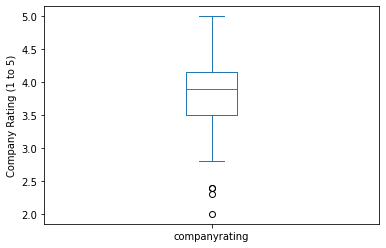

In [42]:
print("Quantiles...")
print(df["companyrating"].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
crs = df[["companyname", "companyrating", "companyratings"]].drop_duplicates().dropna()

# Box Plot
ax = (crs["companyrating"]).plot.box()
ax.set_ylabel("Company Rating (1 to 5)")

print(crs[crs["companyrating"] <= 2.4])



In [45]:
# Frequency Table
binned = pd.cut(crs["companyrating"], 10)
binned.value_counts()

(3.8, 4.1]      28
(3.5, 3.8]      18
(4.1, 4.4]      17
(3.2, 3.5]      16
(2.9, 3.2]       8
(4.4, 4.7]       6
(2.6, 2.9]       3
(4.7, 5.0]       3
(1.997, 2.3]     2
(2.3, 2.6]       2
Name: companyrating, dtype: int64

Text(0.5, 0, 'Company Rating')

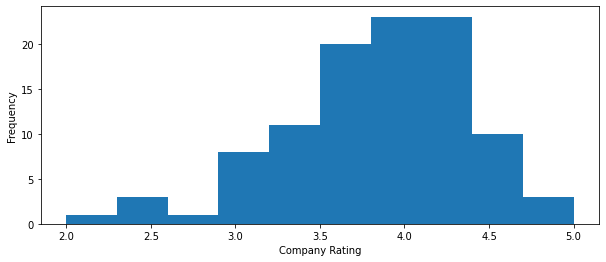

In [47]:
# Histogram
ax2 = crs["companyrating"].plot.hist(figsize=(10,4))
ax2.set_xlabel("Company Rating")

Text(0.5, 3.1999999999999993, 'Company Rating')

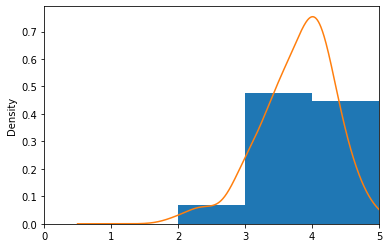

In [53]:
# Density Plot
ax3 = crs["companyrating"].plot.hist(density=True, xlim=[0,5], bins=range(1,12))
crs["companyrating"].plot.density(ax=ax3)
ax.set_xlabel("Company Rating")

# Exploring Binary and Categorical Data
- Mode (most commonly occurring category)
- Expected Value
- Bar Charts
- Pie Charts

In [59]:
sizes = df[["companyname", "companysize"]].drop_duplicates().dropna()
sizes = sizes.groupby(["companysize"]).count()
sizes.reset_index(level=[0], inplace=True)
sizes

,companysize,companyname
0,1 to 50 Employees,16
1,10000+ Employees,26
2,1001 to 5000 Employees,19
3,201 to 500 Employees,9
4,5001 to 10000 Employees,9
5,501 to 1000 Employees,10
6,51 to 200 Employees,14
7,Unknown,6


Text(0, 0.5, 'Count')

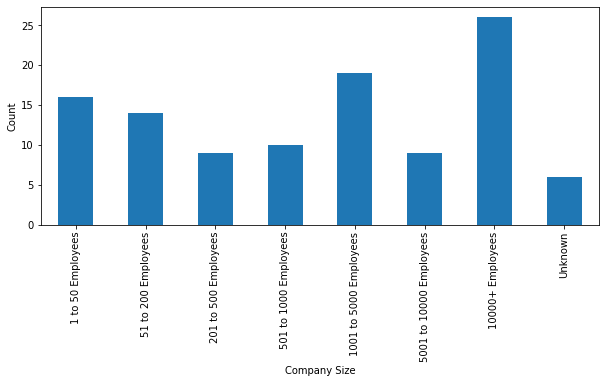

In [64]:
axisorder = ['1 to 50 Employees', '51 to 200 Employees', '201 to 500 Employees', 
    '501 to 1000 Employees', '1001 to 5000 Employees', '5001 to 10000 Employees', 
    '10000+ Employees', 'Unknown']
ax4 = sizes.set_index("companysize").loc[axisorder].plot.bar(figsize=(10,4), legend=False)
ax4.set_xlabel("Company Size")
ax4.set_ylabel("Count")

# Correlation
EDA often contains modeling data in some way, so you should find out how your predictors correlate with your target.
- Correlation Coefficient (A metrics that measures the extent to which numeric variables are associated with one another - ie: from -1 (perfectly uncorrelated) to 1 (perfectly correlated))
- Correlation Matrix (A table of all variables in both row and columns, with the correlation value in each cell)
- Scatterpot (x and y axis have two separate variables)

In [70]:
def tryConvertFloat(st):
    try:
        return float(st)
    except:
        return np.nan

corr = df[["companyrating", "wageavg"]].drop_duplicates()
corr["wageavg"] = corr.apply(lambda x: tryConvertFloat(str(x["wageavg"]).replace(" /yr (est.)", "").replace("$", "").replace(",","")), axis=1)
corr = corr.dropna()
corr

,companyrating,wageavg
1,3.5,60237.0
4,2.4,64959.0
5,2.4,62225.0
9,3.2,79177.0
10,3.8,70428.0
...,...,...
21,4.3,71631.0
26,3.3,65598.0
27,3.3,80932.0
28,4.5,131543.0


<AxesSubplot:>

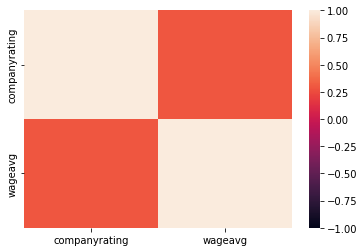

In [69]:
sns.heatmap(corr.corr(), vmin=-1, vmax=1)

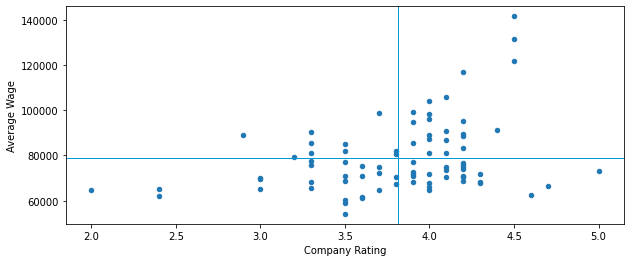

In [76]:
ax5 = corr.plot.scatter(x="companyrating", y="wageavg", figsize=(10,4), color="#3a3a3c")
ax5.set_xlabel("Company Rating")
ax5.set_ylabel("Average Wage")
ax5.axhline(corr["wageavg"].mean(), color="#0099d8", lw=1)
ax5.axvline(corr["companyrating"].mean(), color="#0099d8", lw=1)